# What Amazon Bestseller Is Made Of

### Analyzing key features of top-selling books

#### Importing main libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandasql import sqldf
import circlify

#### Importing data

In [56]:
df_1 = pd.read_csv('Amazon_Top_50_Bestselling_Books.csv')
df_1.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
5,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
6,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
7,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
8,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
9,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction


### Data preparation and cleaning

First of all, we need to understand the data we are going to work with.

In [57]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


We can see that there are no missing values in the dataset. 

Having reviewed data in each column, we've discovered inconsistencies in the followig columns
- Author,
- User Rating,
- Year.

We need to address these before we move to the analysis.

In [58]:
df_2 = sqldf("SELECT DISTINCT(author) FROM df_1 ORDER BY author ASC")
df_2.head(10)

,Author
0,Abraham Verghese
1,Adam Gasiewski
2,Adam Mansbach
3,Adam Silvera
4,Adam Wallace
5,Adir Levy
6,Admiral William H. McRaven
7,Adult Coloring Book Designs
8,Alan Moore
9,Alex Michaelides


By looking at the full list of authors, we can see that some names are misspelled and others are inconsistent. 

In [59]:
df_1.loc[df_1['Author']=='Delegates of the Constitutional','Author']='Delegates of the Constitutional Convention'
df_1.loc[df_1['Author']=='E L James','Author']='E. L. James'
df_1.loc[df_1['Author']=='Eric Larson','Author']='Erik Larson'
df_1.loc[df_1['Author']=='George R.R. Martin','Author']='George R. R. Martin'
df_1.loc[df_1['Author']=='J.K. Rowling','Author']='J. K. Rowling'
df_1.loc[df_1['Author']=='JJ Smith', 'Author']='J. J. Smith'
df_1.loc[df_1['Author']=='M Prefontaine','Author']='M. Prefontaine'
df_1.loc[df_1['Author']=='Ph.D., Katie Stokes, M.Ed.,','Author']='Katie Stokes, Ph.D., M.Ed.'
df_1.loc[df_1['Author']=='The Staff of The Late Show with','Author']='The Staff of The Late Show with Stephen Colbert'

We also need to make sure that the data in the User Rating column is displayed consistently and change the datatype for the Year column from INT64 to DATETIME.

In [60]:
df_1.loc[df_1['User Rating']=='4','User Rating']= 4.0

In [61]:
pd.to_datetime(df_1['Year'], format ='%Y')

0     2009-01-01
1     2009-01-01
2     2009-01-01
3     2009-01-01
4     2009-01-01
         ...    
695   2022-01-01
696   2022-01-01
697   2022-01-01
698   2022-01-01
699   2022-01-01
Name: Year, Length: 700, dtype: datetime64[ns]

### Exploratory data analysis (EDA)

#### Price change over the years

Firstly, we want to see whether the average price of Amazon bestselling books was changing over the years.

In [62]:
# Define values
Year = df_1['Year'].unique()
Average_Price = df_1.groupby('Year')['Price'].mean()

# Bar chart
fig = px.bar(x = Year, 
             y = Average_Price, 
             height = 600,
             labels = {'x':'Year','y':'Average Price'}, 
             title = 'Average Price over the Years'
            )

#Custom color
fig.update_traces(marker_color = '#9932CC')

fig.show()



According to the chart, the average price of Amazon bestsellers was gradually decreasing between 2012 and 2019, but in 2020 the trend was reversed, and the average price started to go up.

The **increase of the average price** is good news for publishers and authors since books prices are directly correlated with the revenue.

#### Genre vs User Rating

Secondly, let's us check what type of books had a higher User Rating in the past years.

In [63]:
df_3 = sqldf("SELECT Genre, AVG(\"User Rating\") FROM df_1 GROUP BY Genre")
df_3

,Genre,"AVG(""User Rating"")"
0,Fiction,4.664103
1,Non Fiction,4.620361


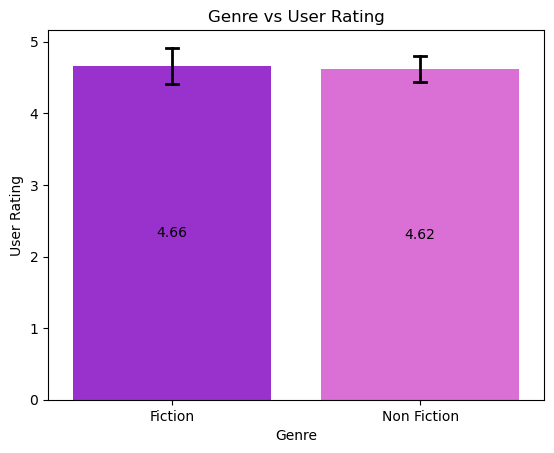

In [64]:
# Custom colors
colors = ['#DA70D6','#9932CC',]

# Bar chart
fig = sns.barplot(
    x = 'Genre', 
    y = 'User Rating', 
    data = df_1,
    palette = colors,
    order = ['Fiction','Non Fiction'],  
    capsize = 0.05,             
    saturation = 8,
    errorbar = 'sd',
    err_kws = {'color':'black','linewidth':2}, 
    hue = 'Genre',
    dodge = False,
    legend = False          
    )

# Title
fig.set_title('Genre vs User Rating', fontsize = 12)

# Bar labels
for container in fig.containers:
    fig.bar_label(container, label_type = 'center', fmt = '%.2f')

plt.show()


Based on the chart, **the average User Rating for both genre categories is quite similar**, with Fiction books having a slightly higher rating. But since the average numbers are so close, we can't say with 100% confidence that one genre prevails over the other.

#### Genre vs Reviews

Now, let us check the total number of Reviews that Fiction and Non Fiction books got over the years and see if there is any difference.

In [65]:
df_4 = sqldf("SELECT Genre, SUM(Reviews), Year FROM df_1 GROUP BY Genre, Year")
df_4

,Genre,SUM(Reviews),Year
0,Fiction,156824,2009
1,Fiction,168185,2010
2,Fiction,217041,2011
3,Fiction,417821,2012
4,Fiction,479684,2013
5,Fiction,562103,2014
6,Fiction,403004,2015
7,Fiction,371702,2016
8,Fiction,350684,2017
9,Fiction,266919,2018


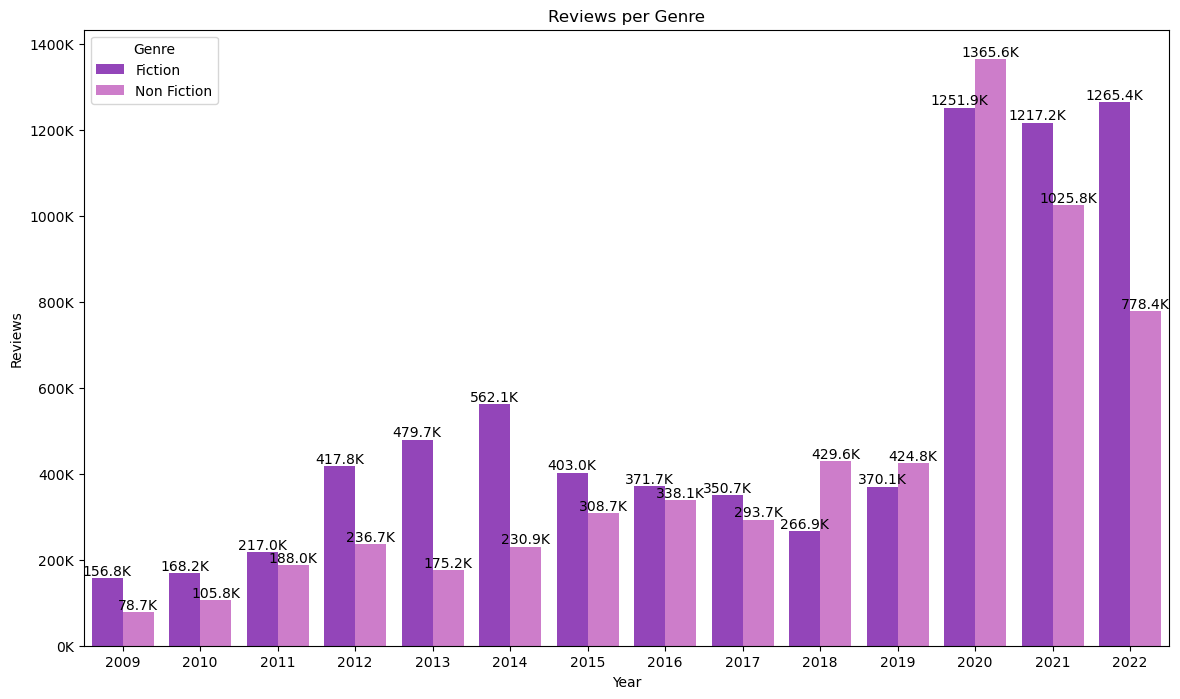

In [66]:
from matplotlib.ticker import FuncFormatter

# Sum of reviews
df_grouped = df_1.groupby(['Year', 'Genre'], as_index = False)['Reviews'].sum()

# Custom colors
colors = ['#9932CC','#DA70D6']

# Figure size
plt.figure(figsize = (14, 8))

# Bar chart
fig = sns.barplot(
    x = 'Year', 
    y = 'Reviews', 
    data = df_grouped,
    palette = colors,
    errorbar = None,
    hue = 'Genre',
    dodge = True,
    legend = True          
    )

# Title
fig.set_title('Reviews per Genre', fontsize = 12)

# Custom formatter for Y-axis values
def thousands_formatter(x, pos):
    return f'{x * 1e-3:.0f}K'

fig.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Bar labels
for container in fig.containers:
    fig.bar_label(container, 
                  labels = [f'{x * 1e-3:.1f}K' for x in container.datavalues], 
                  label_type = 'edge', 
                  fmt = '%.1f',
                  fontsize = 10)

plt.show()


We can see on the chart above that Fiction books were getting more Reviews between 2009 and 2017, but in 2018 the trends was reversed and lasted for the next 3 years (2018 - 2020). **In 2021, however, Fiction books took the lead again, with the gap in the number of Reviews between the genres growing further in 2022.** 

According to the graph, the number of Reviews for both Fiction and Non Fiction books increased significantly during the Covid-19 pandemic, which is not surprising. Many people were staying at home during those years and probably were spending more time reading (compared to previous years) and leaving reviews on Amazon.

Let us now check whether the number of Reviews is correlated with the number of books per genre published each year.

In [67]:
df_5 = sqldf("SELECT Genre, COUNT(Name), Year FROM df_1 GROUP BY Genre, Year")
df_5

,Genre,COUNT(Name),Year
0,Fiction,24,2009
1,Fiction,20,2010
2,Fiction,21,2011
3,Fiction,21,2012
4,Fiction,24,2013
5,Fiction,29,2014
6,Fiction,17,2015
7,Fiction,19,2016
8,Fiction,24,2017
9,Fiction,21,2018


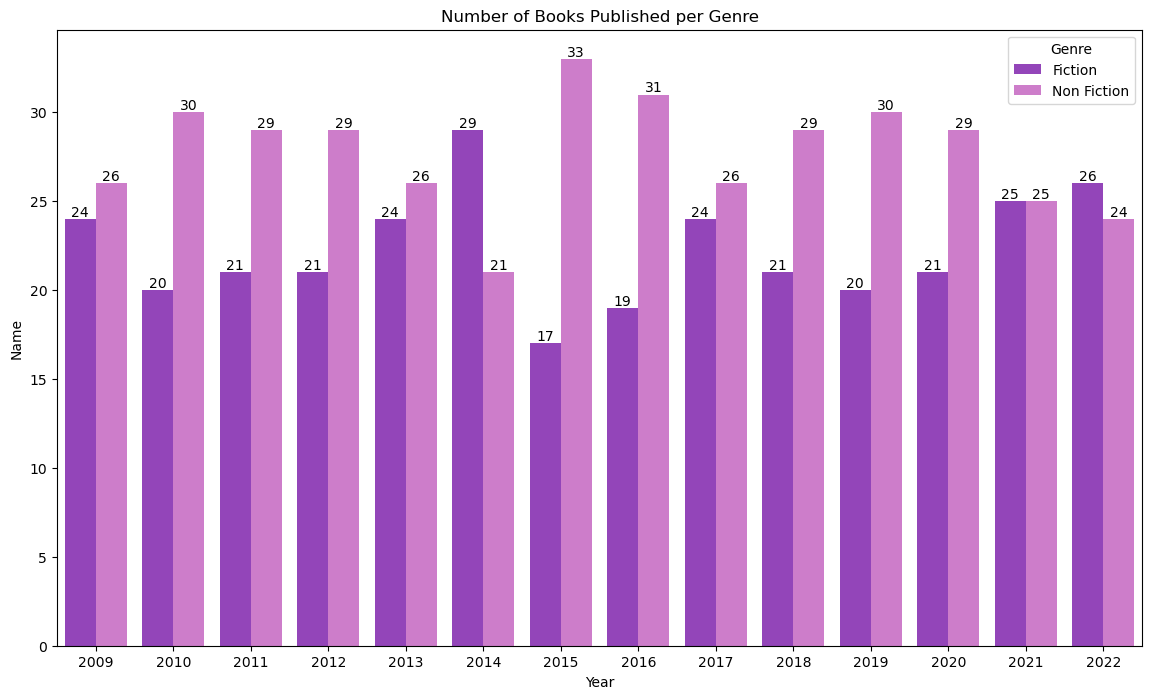

In [68]:
from matplotlib.ticker import FuncFormatter

# Number of books published
df_grouped = df_1.groupby(['Year', 'Genre'], as_index = False)['Name'].count()

# Custom colors
colors = ['#9932CC','#DA70D6']

# Figure size
plt.figure(figsize = (14, 8))

# Bar chart
fig = sns.barplot(
    x = 'Year', 
    y = 'Name', 
    data = df_grouped,
    palette = colors,
    errorbar = None,
    hue = 'Genre',
    dodge = True,
    legend = True          
    )

# Title
fig.set_title('Number of Books Published per Genre', fontsize = 12)

# Bar labels
for container in fig.containers:
    fig.bar_label(container,
                  label_type = 'edge', 
                  fmt = '%.0f',
                  fontsize = 10)

plt.show()


The graph above shows that the number of Non Fiction books published each year was higher in 11 out of 14 years we've analyzed. 

So if we combine the information from both bar charts, we can assume that over the years **Fiction books were getting more Reviews not simply because more of them were published, but probably because people actually read more of them.**

#### Genre vs Price

Now, we are going to check what is the correlation between book genres and prices.

In [69]:
df_6 = sqldf("SELECT Genre, AVG(Price) FROM df_1 GROUP BY Genre")
df_6

,Genre,AVG(Price)
0,Fiction,10.663462
1,Non Fiction,14.337629


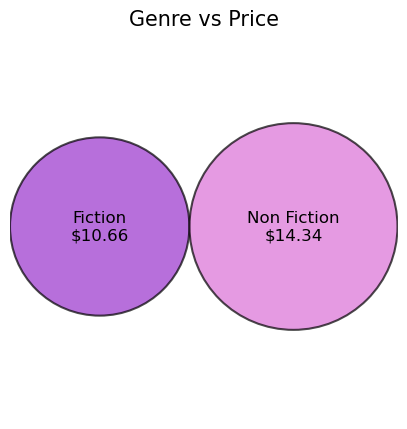

In [70]:
# Average price per genre
average_price = df_1.groupby('Genre')['Price'].mean().reset_index()

# Circlify values
prices = average_price['Price'].tolist()
genres = average_price['Genre'].tolist()

# Circles layout
circles = circlify.circlify(
    average_price['Price'].to_list(), 
    show_enclosure = False, 
    target_enclosure = circlify.Circle(x=0, y=0, r=1)
)

# Sort circles and genres together based on prices
sorted_circles_genres = sorted(zip(circles, genres, prices), key = lambda x: x[2], reverse = True)


# Create container for the Circlify graph
fig, ax = plt.subplots(figsize = (5,5))

# Title
ax.set_title('Genre vs Price', fontsize = 15)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle, _, _ in sorted_circles_genres
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Custom colors
colors = ['#9932CC', '#DA70D6']


# Circle parameters
for circle, genre, price, color in zip(circles, genres, prices, colors):
    x, y, r = circle.x, circle.y, circle.r
    ax.add_patch(plt.Circle((x, y), r, alpha = 0.7, linewidth = 1.5, facecolor = color, edgecolor = 'black'))
    plt.annotate(f'{genre}\n${price:.2f}', (x, y), va = 'center', ha = 'center', fontsize = 12)


We can see that **the average Price for Non Fiction books is higher** than for Fiction ones. Therefore, from the revenue standpoint, writing or publishing Non Fiction books is more beneficial.

#### Price vs Reviews

In this section, we are going to check if more expensive books have better reviews.

In [71]:
fig = px.scatter(df_1, x = 'Price', y = 'User Rating', size = 'Reviews', title = 'Price vs Reviews', height = 600)
fig.update_traces(marker = dict(color = '#9932CC'), opacity = 0.9)

We can see on the graph above that Amazon bestselling books in the price range up to 30 dollars seem to get more reviews compared to the more expensive ones. But it doesn't mean that cheaper books have better reviews. The higher volume of reviews for "under 30" category may indicate the higher number of purchases, which can consequently lead to **the hypothesis that people tend to buy cheaper books on Amazon rather than more expensive ones.** 

#### Metrics Summary

Now, let's take all 4 parameters (Genre, Price, Reviews and User Rating) and create a graph that allows us to see the full picture. 

In [72]:
# Average price & rating grouped by genre
average_df = df_1.groupby('Genre').agg({
    'Price': 'mean',
    'User Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

# Custom formatting for labels
average_df['Reviews_mil'] = (average_df['Reviews'] / 1e6).map(lambda x: f'{x:.2f}M')

print(average_df)

# Custom colors
colors = {'Fiction':'#9932CC', 'Non Fiction':'#DA70D6'}

# Scatter plot
fig = px.scatter(average_df, 
                x = 'Price', 
                y = 'User Rating', 
                height = 350, 
                color = 'Genre',
                text = 'Reviews_mil',
                opacity = 0.8,
                size = 'Reviews', 
                size_max = 80,
                title = 'Average Price, Average Rating and Sum of Review by Genre',
                color_discrete_map = colors
                )

fig.update_traces(textposition = 'middle center')
fig.layout.update(showlegend = True)

fig.show()

         Genre      Price  User Rating  Reviews Reviews_mil
0      Fiction  10.663462     4.664103  7498641       7.50M
1  Non Fiction  14.337629     4.620361  5979996       5.98M


By looking at the plot above, we can conclude that **Fiction books**

- have slightly higher User Rating

- are cheaper

- have more Reviews on Amazon

#### Book title length

A title plays a very important role and can "make it or break it" for the author and/or publisher. Let us find out what is the average length of a book title in our dataset.

In [73]:
# Count the number of words in a title
def count_words(name):
    return len(name.split())

df_1['title_length'] = df_1['Name'].apply(count_words)

# Calculate the average length
average_length = df_1['title_length'].mean()

print(f"The average length of a book title is {average_length:.1f} words.")

The average length of a book title is 8.3 words.


Since many titles in the dataset include subtitles, book series and volume information, we can assume that **8.3 words is an average length not for a title itself but for a title with additional parameters.** And perhaps, this is what authors and publishers should keep in mind. A short title may not give a reader enough information to get interested in a book, but adding a subtitle or mentioning a book series can draw attention and increase chances for a book of being purchased. 

### A Catchy Title: Cluster analysis of book titles 

In this section, we are going to discover the most frequently used words in the titles of the books from our dataset by using data clusters.

In our case, we are clustering text data, therefore, the first step for us will be converting text into numbers. For this project, we are going to use the TF-IDF method and K-means.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,2))

X = vectorizer.fit_transform(df_1['Name'])

pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

,000,000 awesome,10,10 20,10 alphabet,10 board,10 creator,10 day,10 pictures,100,...,year leap,york,york stories,zelda,zelda hyrule,zone,zone big,zoo,zoo animals,zoo lift
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we are going to implement K-means. For K-means, we need to know the number of clusters, but in our case, it is not possible. Therefore, we are going to experiment with the range. We'll assume that the minimum number of clusters is 2 and the maximum number is 9.

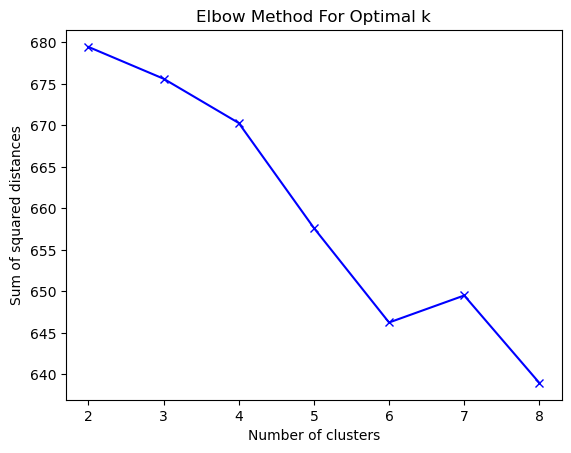

In [75]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []

# K-means clustering
K = range(2,9)
for k in K:
   km = KMeans(n_clusters = k, max_iter = 600, n_init = 10)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that the more clusters we have, the smaller the square distance is. Around Clusters 6 and 7, the sum of squared distance starts declining, so we'll take 6 to be the optimal number of clusters for our dataset.

Next, we are going to get our clusters and prediction labels out of the model.

In [76]:
# Get clusters
true_k = 6
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 600, n_init = 10)
model.fit(X)

# Get prediction labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df_1['Name'].unique(), labels)),columns = ['title','cluster'])
print(book_cl.sort_values(by = ['cluster']))

                                                 title  cluster
0    Act Like a Lady, Think Like a Man: What Men Re...        0
293                                      What Happened        0
291                               Thirteen Reasons Why        0
290                            The Sun and Her Flowers        0
289  The Subtle Art of Not Giving a F*ck: A Counter...        0
..                                                 ...      ...
296                   A Wrinkle in Time (Time Quintet)        5
354                                 Burn After Writing        5
388                                   American Marxism        5
196                                   Love You Forever        5
21                      Outliers: The Story of Success        5

[441 rows x 2 columns]


Now that we've got our clusters, let us find out what are the top 15 most frequently words per cluster.

In [77]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to preprocess titles
def preprocess_title(title):
    title = title.lower()  # Convert to lowercase
    title = re.sub(r'[^a-z\s]', '', title)  # Remove punctuation
    tokens = word_tokenize(title)  # Tokenize
    stop_words = set(stopwords.words('english'))  # Get English stop words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return tokens

# Apply preprocessing to titles
book_cl['processed_title'] = book_cl['title'].apply(preprocess_title)

# Count word frequencies per cluster
cluster_word_counts = {}

for k in range(book_cl['cluster'].nunique()):
    cluster_titles = book_cl[book_cl['cluster'] == k]['processed_title']
    all_words = [word for title in cluster_titles for word in title]
    word_count = Counter(all_words)
    cluster_word_counts[k] = word_count

# Get top words per cluster and print them
top_words_per_cluster = {}
for k, word_count in cluster_word_counts.items():
    top_words = word_count.most_common(15)  # Get top 15 words
    top_words_per_cluster[k] = top_words
    print(f"Cluster {k}:")
    for word, count in top_words:
        print(f"  {word}: {count}")

Cluster 0:
  book: 76
  novel: 36
  kid: 26
  coloring: 19
  man: 18
  love: 16
  dog: 16
  series: 14
  edition: 13
  fifty: 13
  shade: 13
  diary: 12
  wimpy: 12
  guide: 12
  life: 12
Cluster 1:
  craving: 1
  recipe: 1
  food: 1
  want: 1
  eat: 1
  cookbook: 1
  tool: 1
  titan: 1
  tactic: 1
  routine: 1
  habit: 1
  billionaire: 1
  icon: 1
  worldclass: 1
  performer: 1
Cluster 2:
  five: 1
  dysfunction: 1
  team: 1
  leadership: 1
  fable: 1
  official: 1
  sat: 1
  study: 1
  guide: 1
  quiet: 1
  power: 1
  introvert: 1
  world: 1
  cant: 1
  stop: 1
Cluster 3:
  book: 3
  change: 2
  dog: 2
  man: 2
  publication: 1
  manual: 1
  american: 1
  psychological: 1
  association: 1
  th: 1
  edition: 1
  switch: 1
  thing: 1
  hard: 1
  expect: 1
Cluster 4:
  kid: 3
  difficult: 2
  riddle: 2
  smart: 2
  love: 2
  book: 2
  life: 2
  rush: 1
  revere: 1
  brave: 1
  pilgrim: 1
  timetravel: 1
  adventure: 1
  exceptional: 1
  american: 1
Cluster 5:
  story: 3
  time: 3
  heav

We now know what are the most frequently used words in each cluster. Now, let's change the visual representation of our findings and created word clouds from our clusters. 

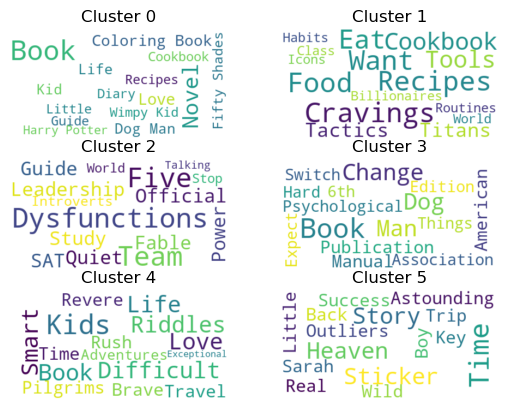

In [78]:
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(text)

   plt.subplot(3, 2, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")

plt.show()

### Conclusion

Based on our analysis of Amazon bestselling books data between 2009 and 2022, we can come up with the following recommendations for authors and publishers

- **Genre seems to have of a little significance when it comes to ratings** of Fiction and Non Fictions books. Average user ratings for both genres differ slightly, with Fiction books average being 0.04 points higher.

- Even though **the average price of Amazon bestsellers have been increasing between 2020 and 2022**, customers may still not be willing to pay a lot of money for their books, so for a publisher and/or a self-publishing author it may be beneficial to focus on more affordable options like e-books or paperbacks.

- **The average price for Non Fiction books is approximately 25% higher** than for Fiction ones, so from the revenue perspective, it can make more sense to write and/or publish books in this genre category. 

- Over the years, **Fiction books have been getting more reviews** which may indicate their persistent popularity among readers. Reviews make products more visible and help them get picked up by algorithms, which serve as a self-promoting mechanism that costs nothing for an author and/or a publisher.

- When it comes to choosing a catchy name for the next potential bestseller, we can assume that **a title containing additional parameters** (like subtitle or mention of a book series) may be beneficial. When it comes book sub-genres, a cookbook or a kids' book may be a good candidate for the next Non Fiction Amazon bestseller. As for Fiction, it is a little harder to predict, but we can assume that thrillers and love stories will continue to be in demand.